# Sample code to illustrate Eigen value and eigenvector computations
Data set used is from the sklearn library called the iris data it contains measurements of three different species of iris flowers. 
By plotting the spread in the data, we expect to see those 3 clusters using the top eigenvectors
There are 150 samples of 4 features each.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import pandas as pd


In [ ]:
#load a dataset on which to compute the eigenvalues and eigen vectors
iris_data = datasets.load_iris()

In [8]:

#load it into a dataframe for analysis
iris_df = pd.DataFrame(data = iris_data['data'],columns = iris_data['feature_names'])
print(iris_df.head())
print(len(iris_df))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
150


In [28]:
#obtain an input matrix to begin eigenvalue computations
#since this is a rectangular matrix of 150 samples and 4 dimensions (sepal length, width, petal length, width)
#we will form a square matrix by doing A^TA This is the first method
Amatrix=np.array(iris_df)
Atransp=np.transpose(Amatrix)
atransposea=np.dot(Atransp,Amatrix)


(4, 4)

[3.55257020e+00 1.19780429e+01 3.15454317e+02 9.20830507e+03]


<BarContainer object of 4 artists>

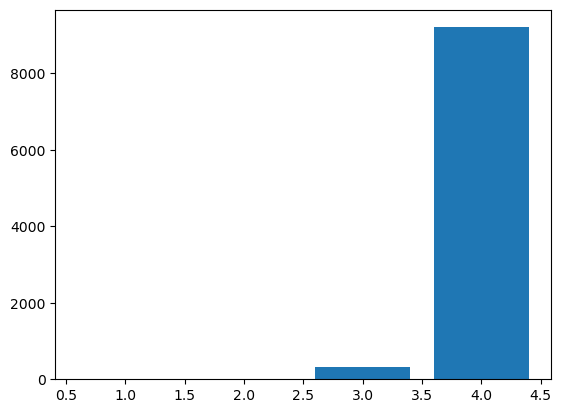

In [36]:
eig_val, eig_vec = np.linalg.eigh(atransposea)
print(eig_val)
#plt.bar(eig_val,height=10)
plt.bar(np.arange(1,5), eig_val)
#the plot shows that only 2 eigen values are dominant (linalg.eigh ranks them in ascending order)

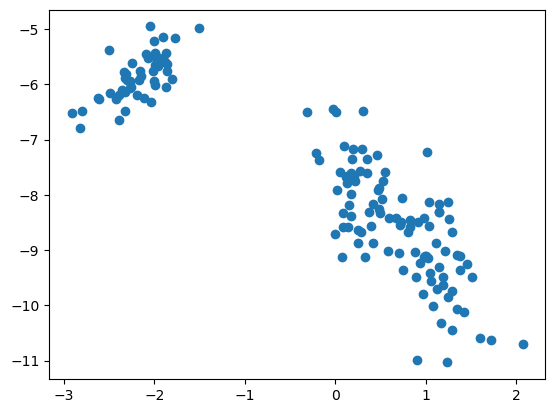

In [20]:
#retaining only the eigenvectors associated with the top 2 eigenvalues and 
# projecting the samples into the plane defined by these eigenvectors, we can see the 3 clusters present in the 
#original data corresponding to the 3 leaf classes.
proj=np.dot(Amatrix,eig_vec)
plt.scatter(proj[:,2],proj[:,3])

[0.02383509 0.0782095  0.24267075 4.22824171]


<BarContainer object of 4 artists>

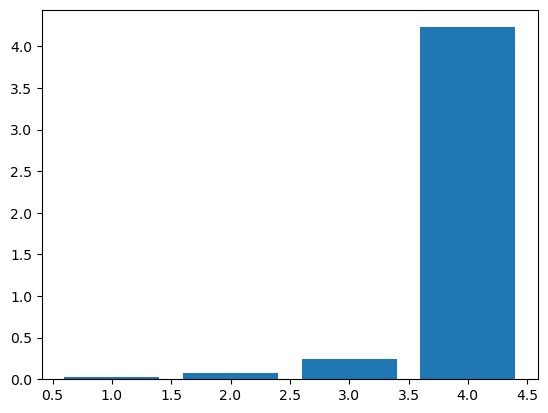

In [39]:
#the second method is doing it through the covariance matrix instead of explicit dot product so some normalization 
#differences may be present but the clusters should be aligned along axes better (may still be rotated)
#the scaling allows other eigenvalues to be more visible
cov_amatrix=np.cov(Atransp)
eig_val, eig_vec = np.linalg.eigh(cov_amatrix)
#plt.plot(eig_val)
print(eig_val)
plt.bar(np.arange(1,5), eig_val)


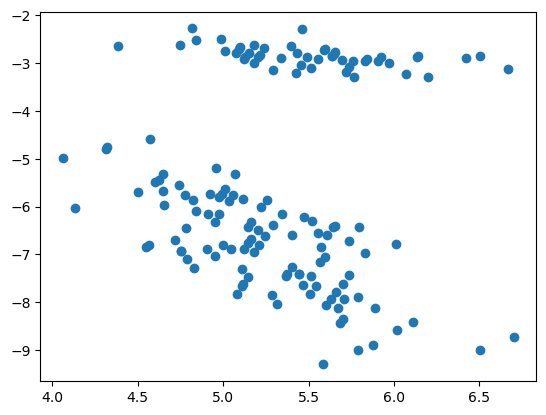

In [26]:
proj=np.dot(Amatrix,eig_vec)
plt.scatter(proj[:,2],proj[:,3])

In [ ]:
#the above code did not fully normalizated for normal pca computations
#normally you would standardize the data by subtracting the mean and dividing by the standard deviation
#and calculating the Covariance matrix.
